In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## 1. Inference about the Mean Response: Confidence Intervals

Suppose that we wish to predict the value of the underlying regression function at a known location $x_{pred}$. Assuming true y value at this x location is $y_{pred}$ and the predicted value is $\hat{y}_{pred}$. $X_{pred}$ matrix is constructed from from the data point $x_{pred}$ as usual

We know:

$$
\hat{y}_{pred} = X_{pred}\hat{\beta}, \text{ where } \hat{\beta} = (X^TX)^{-1}X^TY
$$

Hence:

$$\mathbb{E}[\hat{y}_{pred}] = X_{pred}\mathbb{E}[\hat{\beta}] = X_{pred}\beta = \text{True y value at }x_{pred}, \quad \text{Since }\mathbb{E}[\hat{\beta}] = \beta
$$

Therefore
prediction $\hat{y}_{pred}$ inherits the unbiasedness of $\hat{\beta}$. Now 

$$
Var(\hat{y}_{pred}) = X_{pred}Cov(\hat{\beta})X^T_{pred} = X_{pred} \sigma^2(X^TX)^{-1} X^T_{pred},\quad \text{Since }Cov(\hat{\beta}) = \sigma^2(X^TX)^{-1}
$$

Using an estimate of $\sigma^2: \hat{\sigma}^2$


$$
\widehat{std.dev}(\hat{y}_{pred}) = \hat{\sigma}\sqrt{X_{pred}(X^TX)^{-1} X^T_{pred}}\tag{1}
$$

A $100(1 − α)\%$ Confidence Intervals for $\mathbb{E}(y_{pred})$ is

$$
\hat{y}_{pred} \pm  \widehat{std.dev}(\hat{y}_{pred})  \cdot t \Big(1 - \frac{\alpha}{2};n-p\Big)
$$

***This interval is called a confidence interval for $\mathbb{E}(y_{pred})$***

## 2. Inference about New Observations: Prediction Intervals

Suppose that we wish to predict the value of noisy data point $\hat{y}_{pred}$ (true value $y_{pred}$) at a known location $x_{pred}$. This is different than part 1 above because now we dont want to just make mean a prediction $X_{pred} \beta$ , but we want to predict the actual noisy observation, which is $X_{pred} \beta + \epsilon$

Considering the original model: $Y = X\beta + \epsilon$, The predictions we usually make $\hat{y}_{pred} = X_{pred} \hat{\beta}$, predicts $X_{pred} \beta$ as $X_{pred} \hat{\beta}$ and $\epsilon$ as $0$. Hence both quantities are predicted as estimates of their expectations.

Here uncertainty will also have 2 sources. Since we dont know the true $\beta$, we will be using the estimate of $\beta: \hat{\beta}$, which has an uncertainty as we saw in the last lecture. Additionally, $\epsilon \sim N(0,\sigma^2)$ hence it has an uncertainty as well.

Since, $\epsilon$ is independent of $\hat{\beta}$, we have:

$$
var(y_{pred} - \hat{y}_{pred}) = var(\epsilon) + var(\hat{y}_{pred})
$$

Using (1), we have
$$
var({y_{pred} - \hat{y}_{pred}}) = \sigma^2 + \sigma^2 (X_{pred}(X^TX)^{-1}X^T_{pred})
$$

Therefore,

$$
\widehat{st.dev}({y_{pred} - \hat{y}_{pred}}) = \hat{\sigma} \sqrt{1 + X_{pred}(X^TX)^{-1}X^T_{pred}}
$$

A $100(1 − α)\%$ intervals for $y_{pred}$ is

$$
\hat{y}_{pred} \pm  \widehat{st.dev}({y_{pred} - \hat{y}_{pred}})  \cdot t \Big(1 - \frac{\alpha}{2};n-p\Big)
$$

***This interval is called a prediction interval for $y_{pred}$***

## Generating the data

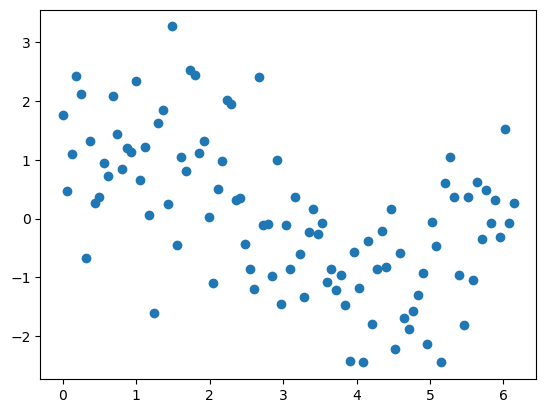

In [2]:
np.random.seed(0)
x = np.linspace(0,6.14,100)
y = np.sin(x)
err = np.random.randn(len(x))
y_noisy = y+err
plt.scatter(x,y_noisy)
plt.show()

In [3]:
def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)
                
        X.append(temp)
    return np.array(X)
X = poly_power(x,n = 3)

## Computing $\beta$

In [4]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_noisy))
beta

array([ 0.83309011,  1.08821273, -0.77634663,  0.09737838])

## Predicting

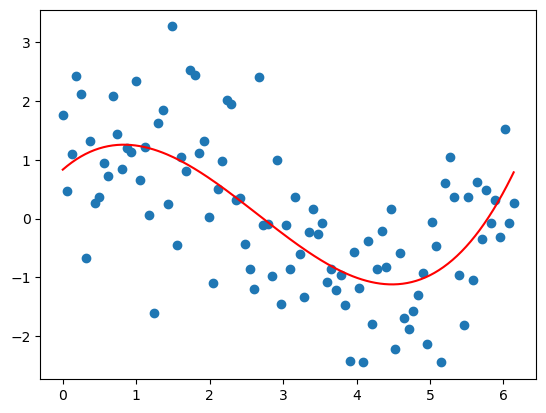

In [5]:
xpred = np.linspace(0,6.14,200)
Xp = poly_power(xpred,n = 3)
yp = Xp.dot(beta)
## plotting the prediction
plt.plot(xpred,yp,color = 'r')
plt.scatter(X[:,1],y_noisy)
plt.show()

## $\hat{\sigma}$

In [6]:
e = y_noisy - X.dot(beta)
var = np.linalg.norm(e)**2/(len(y_noisy) - 3)
std = np.sqrt(var)
std

0.9470043233402284

#### $\widehat{std.dev}(\hat{y}_{pred}) = \hat{\sigma}\sqrt{X_{pred}(X^TX)^{-1} X^T_{pred}}$ 

In [7]:
term1 = np.diag(Xp.dot(np.linalg.inv(X.T.dot(X))).dot(Xp.T))
term2 = np.sqrt(term1)
std_ypred = std*term2

#### $\hat{y}_{pred} \pm  \widehat{std.dev}(\hat{y}_{pred})  \cdot t \Big(1 - \frac{\alpha}{2};n-p\Big)$ 

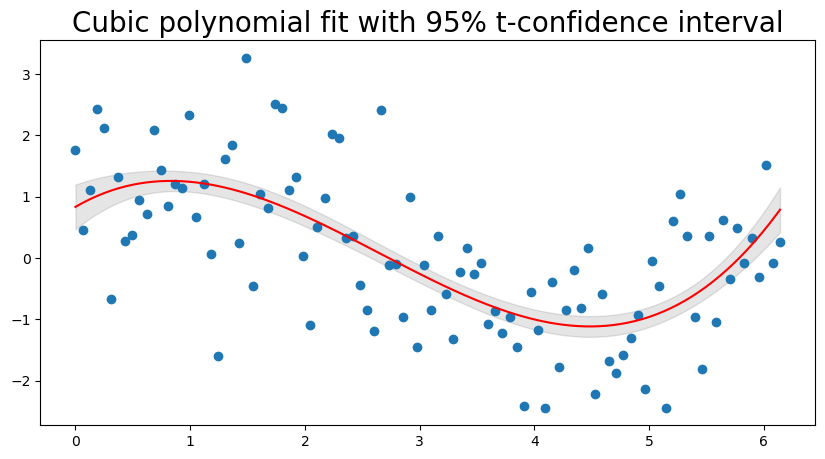

In [8]:
## plotting confidence interval
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(xpred,yp,color = 'r')
ax.fill_between(xpred,yp-std_ypred,yp+std_ypred,alpha = 0.1,color = 'k')
ax.scatter(X[:,1],y_noisy)
ax.set_title('Cubic polynomial fit with 95% t-confidence interval',size= 20)
plt.show()

### <mark style="background-color: #FFFF00">Exercise</mark> 

1. For the same data, plot 95%t-Prediction Interval
2. Plot the Confidence Interval and the Prediction Interval in the same plot and comment on their relative thickness